1. The standard deviation reflects the spread of individual data points in the sample, while standard error of the mean shows the deviation between true population means and estimated sample means.

https://chatgpt.com/share/66fdf97b-729c-800f-8321-6da1b83d4509

2. First, calculate the sample mean. Then, figure out how much that sample mean might vary by calculating the standard error of the mean. To get a rough range of the true mean, take the sample mean and add and subtract about 2 times the standard error. This gives an interval that typically covers 95% of the sample means.

https://chatgpt.com/share/66fe09b8-9ac8-800f-ab2d-569ca5cd0f7c

3. First resample the data many times with replacement and calculate the mean for each resample. Then, sort these bootstrapped means and find the 2.5th and 97.5th percentiles. The range between these two percentiles forms the 95% confidence interval.

https://chatgpt.com/share/66fe09b8-9ac8-800f-ab2d-569ca5cd0f7c

In [ ]:
import numpy as np

def bootstrap_confidence_interval(data, num_samples=1000, stat_function=np.mean, conf_level=0.95):
    """
    Calculate a bootstrap confidence interval for a given statistic.
    
    Parameters:
    - data: The original dataset (array-like).
    - num_samples: Number of bootstrap samples (default 1000).
    - stat_function: The statistic function (default np.mean).
    - conf_level: The confidence level (default 0.95).
    
    Returns:
    - A tuple (lower_bound, upper_bound) representing the confidence interval.
    """
    # Generate bootstrap samples and compute the statistic for each
    stats = [stat_function(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_samples)]
    
    # Compute the percentiles for the confidence interval
    lower_bound = np.percentile(stats, (1 - conf_level) / 2 * 100)
    upper_bound = np.percentile(stats, (1 + conf_level) / 2 * 100)
    
    return lower_bound, upper_bound


# Example usage
sample_data = np.array([12, 7, 19, 15, 10, 14, 8, 13, 16, 11])

# Calculate 95% bootstrap confidence interval for the mean
mean_ci = bootstrap_confidence_interval(sample_data)
print(f"95% CI for the Mean: {mean_ci}")

# Calculate 95% bootstrap confidence interval for the median
median_ci = bootstrap_confidence_interval(sample_data, stat_function=np.median)
print(f"95% CI for the Median: {median_ci}")

4. In this code, we can just change the stat_function to use other parameter. For instance, let stat_function=np.median or =np.std

https://chatgpt.com/share/66fe09b8-9ac8-800f-ab2d-569ca5cd0f7c

5. Because we are using the sample statistic to infer the population parameter which is hard to compute or find. So we know the uncertainty inherent in making inferences from samples to populations.

https://chatgpt.com/share/66fec849-83d0-800f-8a03-901649d18694

6. 
1. Imagine there is a bag of marbles, but we can only pull out a small handful at a time. We want to know something about the entire bag, like the average size of the marbles, but we only have a few in our hand. Bootstrapping is like taking that small handful of marbles, throwing them back in the bag, and then repeatedly pulling out new handfuls to get a better idea of what the whole bag is like.
2. The main point of bootstrapping is to give a way to estimate things about the entire population when we only have a small sample.
3. Also take the sample of marbles and resample from it many times. Then, for each resample, calculate the average size of the marbles. After doing this a lot of times, we’ll have a distribution of possible average sizes based on the sample. Now, compare the hypothesized guess to this distribution. If the guess falls within the range of these bootstrapped averages, it might be plausible. But if the guess is way off compared to most of these bootstrapped averages, then it might be less plausible.

7. If the confidence interval includes zero, it means that zero is a plausible value for the population mean based on the data. Even if the sample mean isn’t zero, having zero within the interval indicates we don’t have enough evidence to confidently say the population mean is different from zero. Therefore, we fail to reject the null hypothesis. And if it dosen't include zero, there will be enough evidence to prove it.

8.1.1 In this analysis, the null hypothesis of “no effect” means that the vaccine does not significantly improve the health of patients. Specifically, the average change in health scores after receiving the vaccine is zero. If we cannot reject the null hypothesis, we conclude that the vaccine may not have a significant effect on health. If we can reject it, we conclude that the vaccine does have a significant effect.
  
  1.2 This chart below shows the initial and final health scores of each patient, providing a preliminary look at the overall change in health status before and after vaccination.

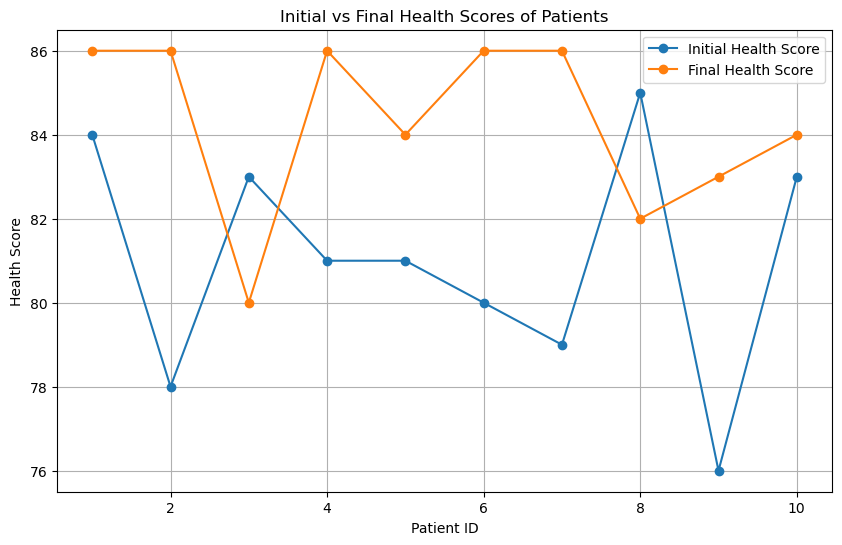

array([0.9, 5.6])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Create the CSV data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Calculate the difference in health scores
df["HealthScoreDifference"] = df["FinalHealthScore"] - df["InitialHealthScore"]

# Visualize the initial and final health scores
plt.figure(figsize=(10, 6))
plt.plot(df["PatientID"], df["InitialHealthScore"], label="Initial Health Score", marker='o')
plt.plot(df["PatientID"], df["FinalHealthScore"], label="Final Health Score", marker='o')
plt.xlabel("Patient ID")
plt.ylabel("Health Score")
plt.title("Initial vs Final Health Scores of Patients")
plt.legend()
plt.grid(True)
plt.show()

# Bootstrapping to generate a confidence interval for the mean difference in health scores
def bootstrap_mean_diff(data, n_iterations=10000):
    bootstrap_means = []
    for _ in range(n_iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return np.percentile(bootstrap_means, [2.5, 97.5])

# Perform bootstrapping on the health score differences
confidence_interval = bootstrap_mean_diff(df["HealthScoreDifference"].values)

# Output the result
confidence_interval

8.2.1 To determine if the vaccine is effective, we use bootstrapping to estimate a 95% confidence interval for the average change in health scores. Bootstrapping allows us to assess the uncertainty around the mean change in health scores without relying on distributional assumptions.

8.3.1 The 95% confidence interval estimated using bootstrapping is [0.9, 5.6], and since this interval does not include zero, it suggests a statistically significant positive impact on health scores after vaccination. The confidence interval indicates that the observed improvement in health scores is unlikely to be due to random chance. Therefore, we confidently reject the null hypothesis of “no effect,” concluding that the vaccine has a significant effect in improving health. This means the vaccine is effective, and the improvement in health is not just random variability.

8.3.2 Increasing the sample size could improve the robustness and reliability of the analysis.

9. yes